In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import visualization
import numpy as np


gender = pd.read_csv("data/gender_submission.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train["Sex"] = train["Sex"].map({"male":0, "female":1})

* EDA 과정
    1. 데이터 수집
    2. 시각화 탐색
    3. 패턴 도출
    4. 인사이트 발굴

<AxesSubplot:xlabel='SibSp', ylabel='count'>

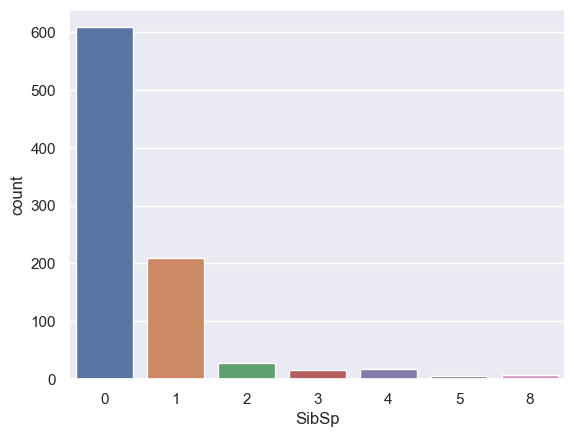

In [96]:
train.isnull().sum()
train["Sex"].value_counts()
sns.countplot(x = "SibSp", data = train)

In [97]:
train["Died"] = 1-train["Survived"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


<AxesSubplot:xlabel='Pclass', ylabel='count'>

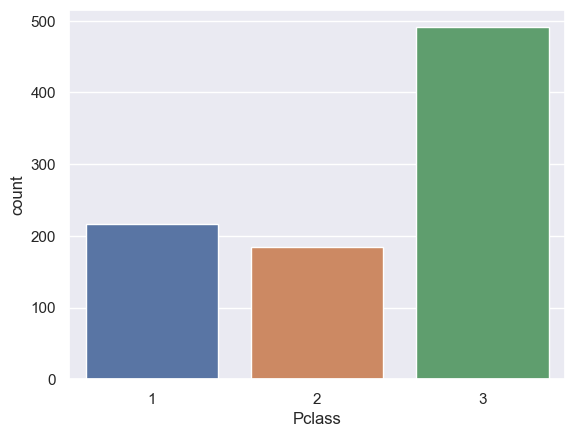

In [98]:
below_30 = train[(train["Survived"] == 1) & (train["Age"] <= 30)]

# 30대 이하의 살아남은 남성과 여성의 표
sns.countplot(x = "Pclass",  data = train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

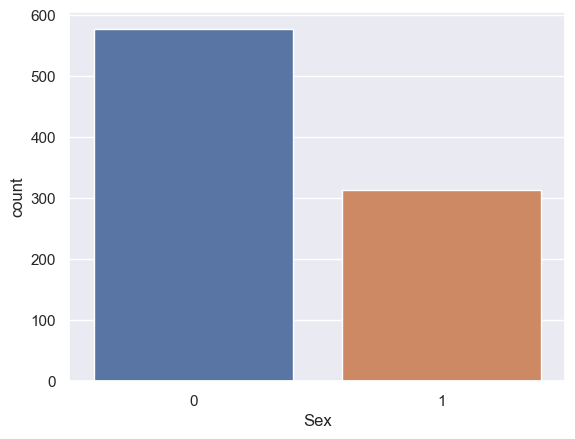

In [99]:
sns.countplot(x="Sex", data = train)

In [100]:
attribute = list(train.columns)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

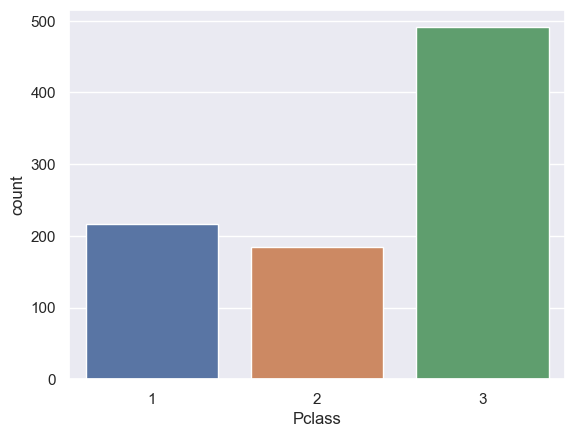

In [101]:
sns.countplot(data = train,  x = attribute[2])

In [102]:
# woman = train.loc[train.Sex == "female"]["Survived"]
# woman_survived_rate = sum(woman)/len(woman)

# print(f"Woman Survived Rate: {woman_survived_rate:.2f}")


### 결측치 처리하기

1. 결측치 모두 제거하기
    * 간단하지만 결측치가 많을 경우 데이터의 손실이 우려
    * 높은 비율의 결측치가 있을 경우 해당 특성을 제거하는게 적절할 수도 있음
<br>

2. 대체값으로 결측치 대체
    * 해당 특성의 데이터 분포나 특성을 고려하여 결정할 수 있음
    * 평균, 중앙값, 최빈값, 회귀분석, KNN, MICE등의 방법을 이용하여 대체 가능

In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Died             0
dtype: int64

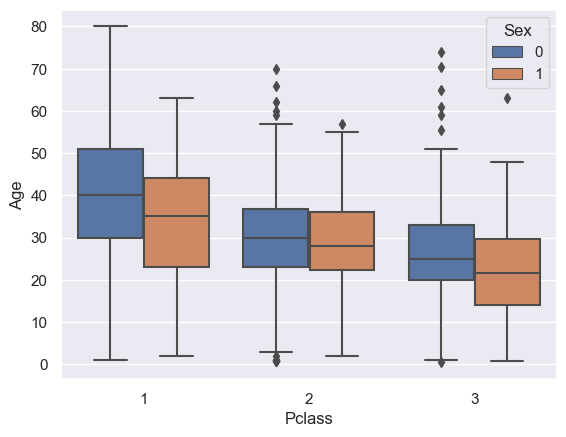

In [104]:
age_data = train.dropna(subset = ["Age"]) #Age의 결측치 제거
sns.boxplot(x="Pclass", y = "Age",data = age_data, hue= "Sex") #Pclass 2번 남성의 이산치가 많음
plt.show()

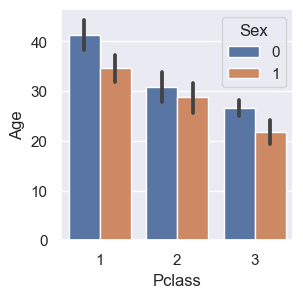

In [105]:
sns.set(style = "darkgrid")
plt.figure(figsize = (3,3))
sns.barplot(x = "Pclass", y = "Age", hue="Sex", data = train)
plt.show()

### Age를 회귀분석으로 결측치 채우기

In [106]:
variable = ["SibSp", "Sex", "Pclass", "Parch"]
train_age_notnull = train.dropna(subset=["Age"])
train_age_notnull["Sex"] = train_age_notnull["Sex"].replace({"male":0, "female":1}) #train = pd.get_dummies(train, columns=["Age"])

X = train_age_notnull[variable]
y = train_age_notnull["Age"]

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

     SibSp  Sex  Pclass  Parch
0        1    0       3      0
1        1    1       1      0
2        0    1       3      0
3        1    1       1      0
4        0    0       3      0
..     ...  ...     ...    ...
885      0    1       3      5
886      0    0       2      0
887      0    1       1      0
889      0    0       1      0
890      0    0       3      0

[714 rows x 4 columns]


C:\Users\john cookie\AppData\Local\Temp\ipykernel_14888\2734412440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_age_notnull["Sex"] = train_age_notnull["Sex"].replace({"male":0, "female":1}) #train = pd.get_dummies(train, columns=["Age"])


In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# 회귀 문제에서 주로 사용되며 모델이 예측한 값과 실제 값의 차이를 제곱한 값의 평균을 계산
#RMSE는 낮을수록 성능이 좋다. 
print("RMSE:",rmse) 
# Accuracy는 일반적으로 분류에서 사용되기 때문에 Age와 같은 연속적인 데이터엔 맞지 않다.
# 전체 예측 중 올바르게 예측한 결과의 비율
# accuracy = accuracy_score(y_test, y_pred) 
# print("Accuracy:", accuracy)

RMSE: 11.862274165927234


In [109]:
#Age가 null인 값의 Variable들만 가져와서 예측값을 loc를 통해서 넣어줬음
test_data_null = train[train["Age"].isnull()]
age_test = test_data_null[["SibSp", "Sex", "Pclass", "Parch"]]
predicted_age = model.predict(age_test)
train.loc[train["Age"].isnull(), "Age"] = predicted_age

In [111]:
visualization.compare_of_two_attribute(train, x = "Sex", title = "Survivors by Gender", hue = "Survived")

TypeError: compare_of_two_attribute() got an unexpected keyword argument 'title'